<a href="https://colab.research.google.com/github/sethu-7/Classification-of-Heart-Disease/blob/main/Classification_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We are going to use pandas, numpy and matplotlib for hert disease classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,auc

**Loading Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML/heart-disease.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

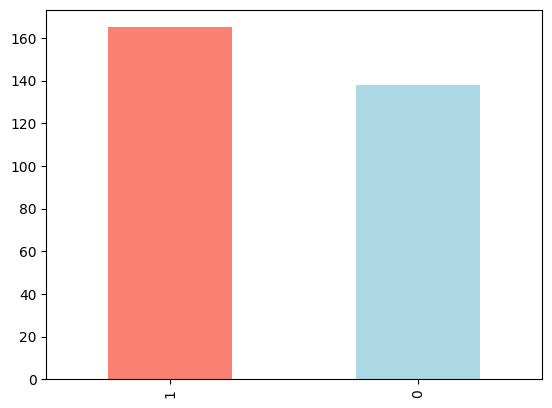

In [ ]:
df["target"].value_counts().plot(kind="bar",color=['salmon','lightblue'])

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

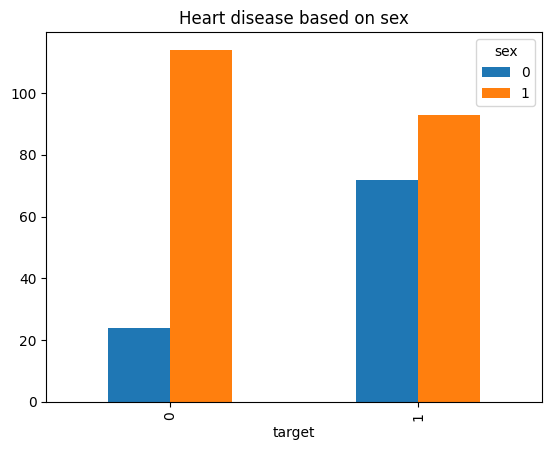

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar");
plt.title("Heart disease based on sex");

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


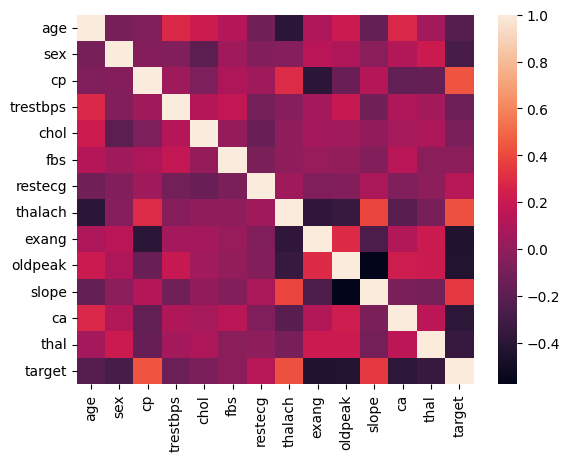

In [ ]:
ax=sns.heatmap(df.corr())

**Modelling**

In [ ]:
X=df.drop('target',axis=1)
Y=df["target"]

In [ ]:
X.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
dtype: int64

In [ ]:
Y.count()


303

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

**Model Experimenting**


In [ ]:
models={"Logistic Regression":LogisticRegression(),"RandomForest":RandomForestClassifier(),"KNeughbours":KNeighborsClassifier()}

In [ ]:
def model_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        score[name]=model.score(x_test,y_test)
    return score

In [ ]:
model_s=model_score(models,x_train,x_test,y_train,y_test)
print(model_s)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442, 'RandomForest': 0.819672131147541, 'KNeughbours': 0.6065573770491803}


<Axes: >

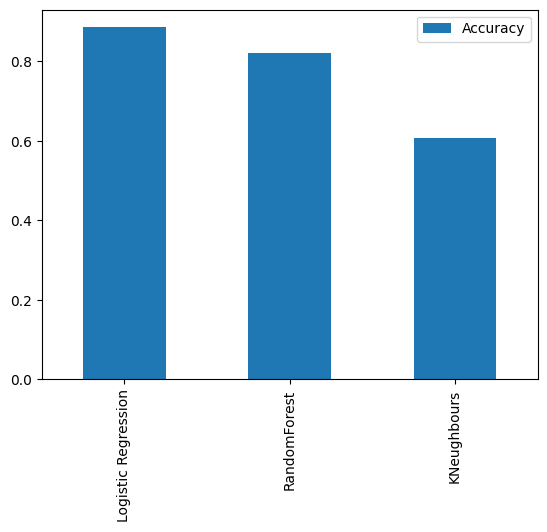

In [ ]:
df_score=pd.DataFrame(model_s,index=["Accuracy"])
df_score.T.plot(kind='bar')

*Improving Model*

##Hyper Parameter Tuning##

In [ ]:
knn=KNeighborsClassifier()
train_scores=[]
test_scores=[]
for i in range(1,21):
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))


In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.8140495867768595,
 0.7768595041322314,
 0.7727272727272727,
 0.78099173553719,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.6900826446280992,
 0.7066115702479339,
 0.6735537190082644,
 0.7148760330578512,
 0.6900826446280992,
 0.6900826446280992,
 0.6859504132231405,
 0.7024793388429752,
 0.6818181818181818,
 0.6859504132231405,
 0.6859504132231405]

In [ ]:
test_scores

[0.6065573770491803,
 0.5245901639344263,
 0.5409836065573771,
 0.5737704918032787,
 0.6065573770491803,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853]

([<matplotlib.axis.XTick at 0x781b0ff4ee00>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

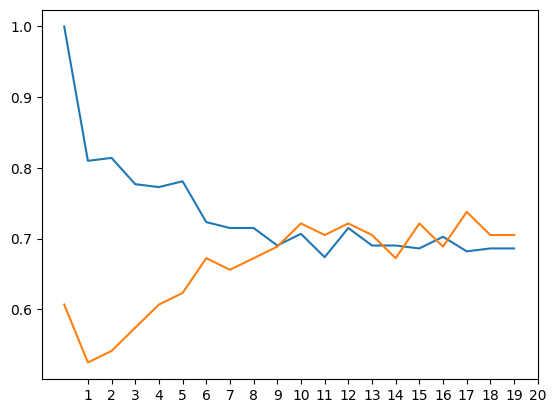

In [ ]:
plt.plot(train_scores)
plt.plot(test_scores)
plt.xticks(np.arange(1,21,1))

In [ ]:
print(f"max accuracy for KNN ={max(test_scores)}%")

max accuracy for KNN =0.7377049180327869%


In [ ]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [ ]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

In [ ]:
rs_log_reg

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
 rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [ ]:
rf_log=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

In [ ]:
rf_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rf_log.score(x_test,y_test)

0.8852459016393442

In [ ]:
rf_log.best_params_

{'n_estimators': 660,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_depth': 10}

**GridSerachCV**

In [ ]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

In [ ]:
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

##Evaluating Model##

In [ ]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
y_test

86     1
226    0
87     1
39     1
102    1
      ..
175    0
163    1
94     1
91     1
300    0
Name: target, Length: 61, dtype: int64

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

In [ ]:
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')


AUC: 0.8793103448275862


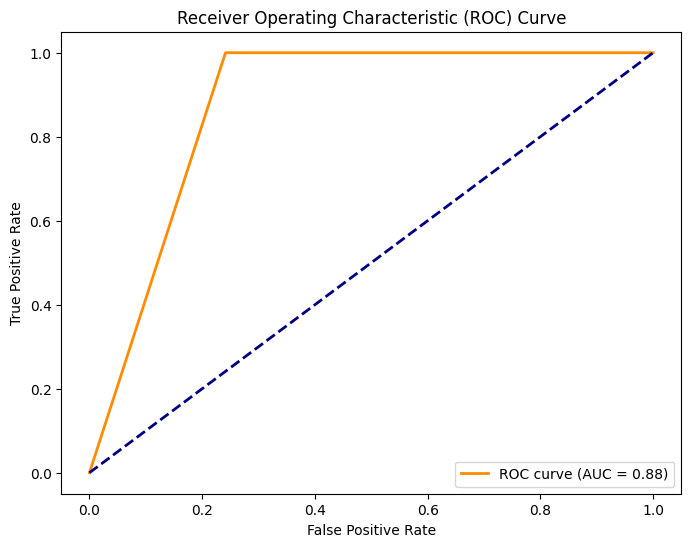

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


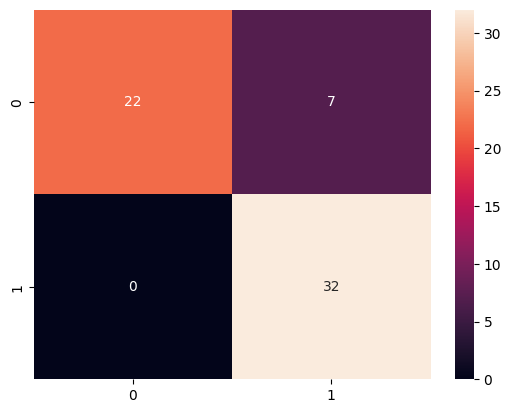

In [ ]:
ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        29
           1       0.82      1.00      0.90        32

    accuracy                           0.89        61
   macro avg       0.91      0.88      0.88        61
weighted avg       0.91      0.89      0.88        61



**Calculating evaluation metrics using cross val score**

In [ ]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
cf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
cross_val_score(cf,X,Y,cv=5,scoring='accuracy')

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
acc=np.mean(cross_val_score(cf,X,Y,cv=5,scoring='accuracy'))
acc

0.8479781420765027

In [ ]:
pres=np.mean(cross_val_score(cf,X,Y,cv=5,scoring='precision'))
pres

0.8215873015873015

In [ ]:
f1_score=np.mean(cross_val_score(cf,X,Y,cv=5,scoring='f1'))
f1_score

0.8705403543192143

In [ ]:
recall=np.mean(cross_val_score(cf,X,Y,cv=5,scoring='recall'))
recall

0.9272727272727274

<Axes: >

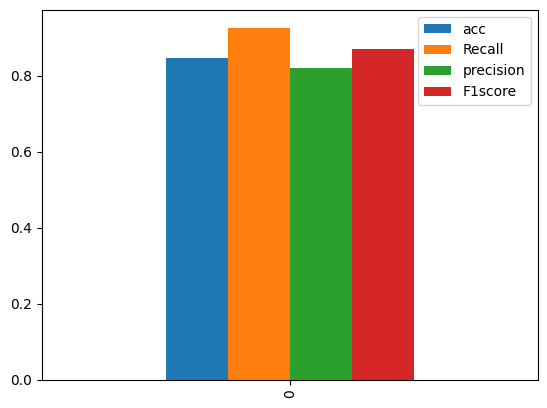

In [ ]:
dff=pd.DataFrame({"acc":acc,"Recall":recall,"precision":pres,"F1score":f1_score},index=[0])
dff.plot.bar()

##Feature importance##

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
cf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
cf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
cf.coef_

array([[ 0.01398486, -0.81796264,  0.60759683, -0.01950894, -0.00169228,
        -0.01405985,  0.32081505,  0.02805359, -0.57195358, -0.4855806 ,
         0.37608238, -0.62747435, -0.65052193]])

In [ ]:
# 0 required to extract each number for each feature
feature_dict=dict(zip(df.columns,list(cf.coef_[0])))
feature_dict

{'age': 0.013984860670155077,
 'sex': -0.8179626438655719,
 'cp': 0.6075968348223194,
 'trestbps': -0.01950894039311401,
 'chol': -0.0016922814485528519,
 'fbs': -0.014059853037304929,
 'restecg': 0.32081505275650213,
 'thalach': 0.02805358829439449,
 'exang': -0.571953581610208,
 'oldpeak': -0.48558060054349494,
 'slope': 0.3760823779224556,
 'ca': -0.6274743495001786,
 'thal': -0.6505219335864902}

<Axes: >

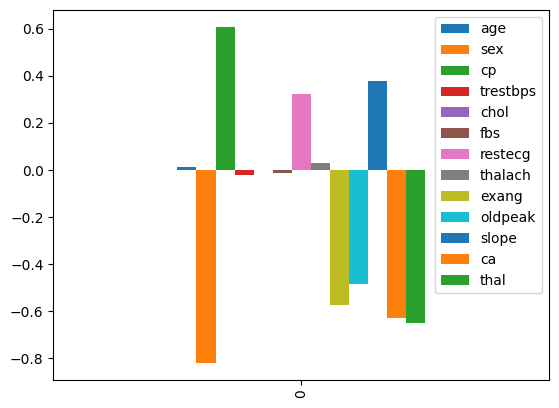

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.plot.bar()